In [1]:
import numpy as np
import pandas as pd


In [173]:

# df = pd.read_csv('spam.csv', encoding='latin-1')
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [174]:
df.sample(5)

,label,message
3726,ham,Nothing spl..wat abt u and whr ru?
3951,ham,I got to video tape pple type in message lor. ...
1899,ham,Wat would u like 4 ur birthday?
1881,ham,Just seeing your missed call my dear brother. ...
1420,ham,Speak only when you feel your words are better...


In [6]:
#1. Data Cleaning, 2. EDA - Exploratary Data Analysis 3.Text Preprossing 4. Model Building 5. Evaluation 6. Improvement


**Data Cleaning**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [177]:
# df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# df.sample(5)

In [179]:
# #renaming columns
# df.rename(columns={'v1':'target','v2':'text'},inplace=True)
# df.sample(5)

In [180]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [181]:
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
#missing vakue
df.isnull().sum()

,0
label,0
message,0


In [183]:
#Check for duplicate value
df.duplicated().sum()
#remove dulicated
df = df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape

(5169, 2)

**EDA**

In [184]:
df['label'].value_counts()

,count
label,
0,4516
1,653


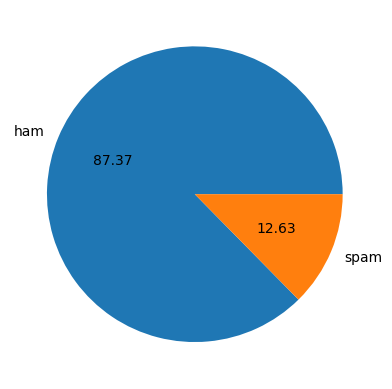

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [29]:
# data imbalanced
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [185]:
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentence'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-4174978355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['message'].apply(len)
/tmp/ipython-input-4174978355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
/tmp/ipython-input-4174978355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [186]:
df.head()

,label,message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [187]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [188]:
df[df['label'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

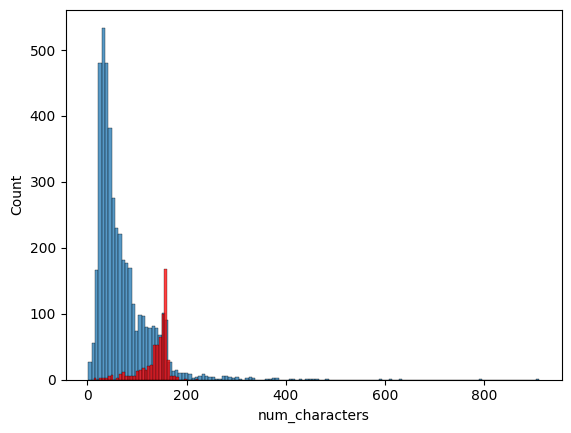

In [45]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

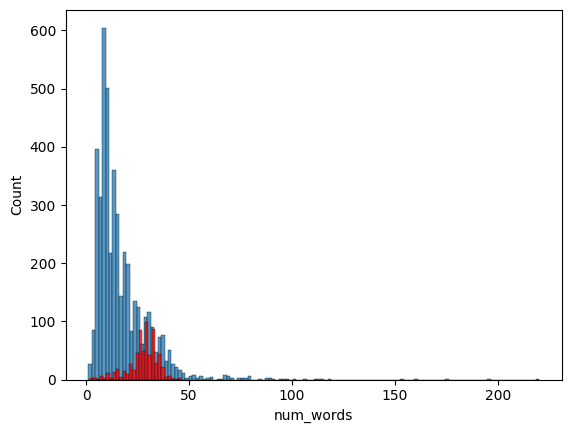

In [46]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

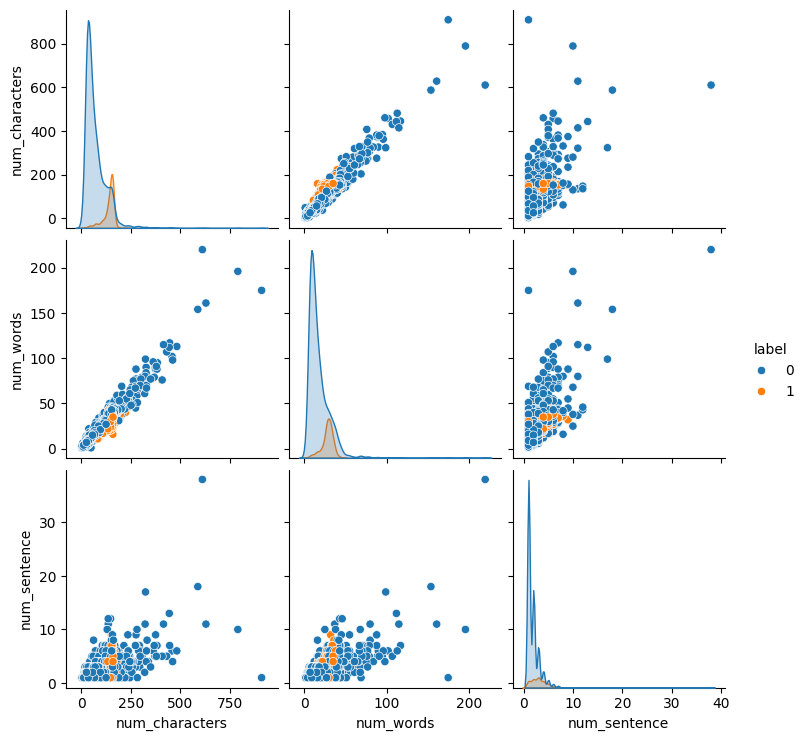

In [189]:
sns.pairplot(df,hue='label')

***Data Preprocessing***
Lower case
Tokenization
Removing special characetrs
removing stop word and puncuations
stemming

In [190]:
from nltk.corpus import stopwords
import string

In [191]:
def transform_text(text):
  #lower case
  text = text.lower()

  #Tokenization
  text = nltk.word_tokenize(text)

  y=[]
  #removing Special Charcetrs
  for i in text:
    if i.isalnum():
      y.append(i)

  #Removing stop words
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [192]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [231]:
df['transformed_text'] = df['message'].apply(transform_text)

/tmp/ipython-input-3273314684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['message'].apply(transform_text)


In [194]:
df.head()

,label,message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [195]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

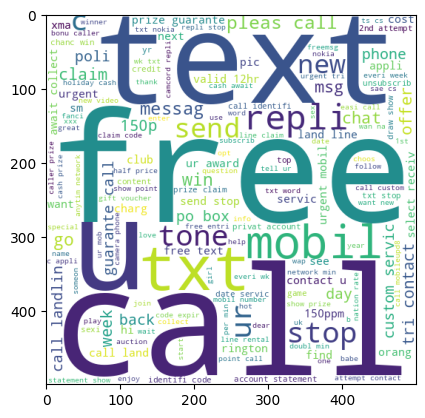

In [232]:
spam_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

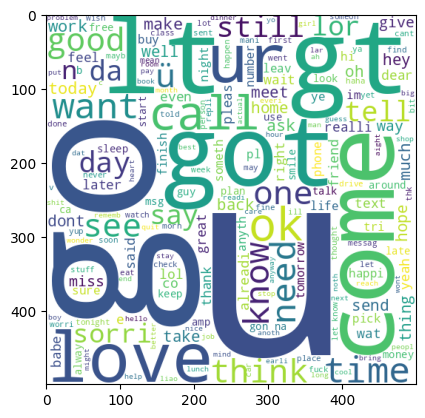

In [234]:
ham_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)


In [235]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)




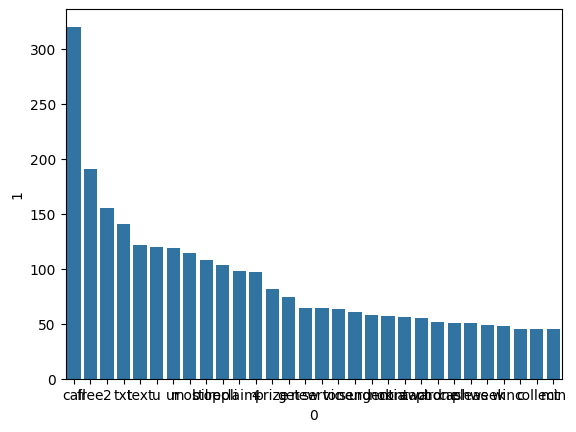

In [236]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.show()

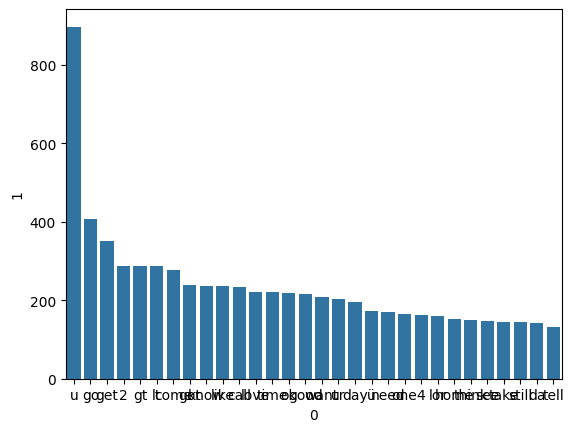

In [237]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.show()


In [238]:
df.head()

,label,message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Model Building**

In [220]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [239]:
X = tf.fit_transform(df['transformed_text']).toarray()
Y = df['label'].values

In [222]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [224]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [225]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [226]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8636363636363636
[[790 118]
 [ 23 103]]
0.4660633484162896


In [227]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9671179883945842
[[908   0]
 [ 34  92]]
1.0


In [228]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9738878143133463
[[906   2]
 [ 25 101]]
0.9805825242718447


In [229]:
# TFIDF ------> MNB
#Model Improvement
#1. Change the max_features parameter of tfidf
#2. Scaling
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
y_pred4 = rf.predict(X_test)
print(accuracy_score(Y_test,y_pred4))
print(confusion_matrix(Y_test,y_pred4))
print(precision_score(Y_test,y_pred4))

0.9738878143133463
[[906   2]
 [ 25 101]]
0.9805825242718447


In [240]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model2.pkl','wb'))